<a href="https://colab.research.google.com/github/Ericaly21/UnlimitedPaneraSipClub/blob/main/GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project Progress Report (20 points), **Due April 5th **

The progress report is a chance for you to take stock of how far you have come and to reflect on whether or not you are comfortable with the substance or scope of your final project. The format of the progress report will be a Jupyter notebook that should be uploaded to the private github repository you have set up for your team. It should Include: **bold text**


# **Project introduction: an introduction that discusses the data and related problems that you are investigating.**

We're a team of students conducting a study to understand the effects of Panera Bread's Unlimited Sip Club subscription service on customer behavior, satisfaction, and its overall impact on revenue. The data we collected provides insights that are invaluable to us as we aim to uncover how this innovative subscription model influences dining choices, frequency of visits, and customer perceptions of value and convenience.

# **Any changes since the proposal:**

No changes to the proposal :)

# **Data:**
We've conducted a survey about the sip club and passed it around to students/friends/family members and random panera customers. Here is the link: https://forms.gle/tv8xnEfrjMQMrGVz9. The data was then extracted from there and placed into an excel spreadsheet.

# **Exploratory data analysis:**

At least five visualizations that shows an interesting hypothesis, along with an
explanation about why you thought this was an interesting hypothesis to
Investigate. Write the name of the member(s) who is responsible for each of them while explaining it.

# **Erica's Visualization #1 - bar charts**

This visualization can help provide information on how who is a current sip club member and what their reason was for joining the sip club. This is interesting to investiagte since it will give us an idea of whether or not it has increased foot traffic in the restaurant.

Saving Unlimited Panera Sip Club Survey (Responses) - Form Responses 1.csv to Unlimited Panera Sip Club Survey (Responses) - Form Responses 1.csv


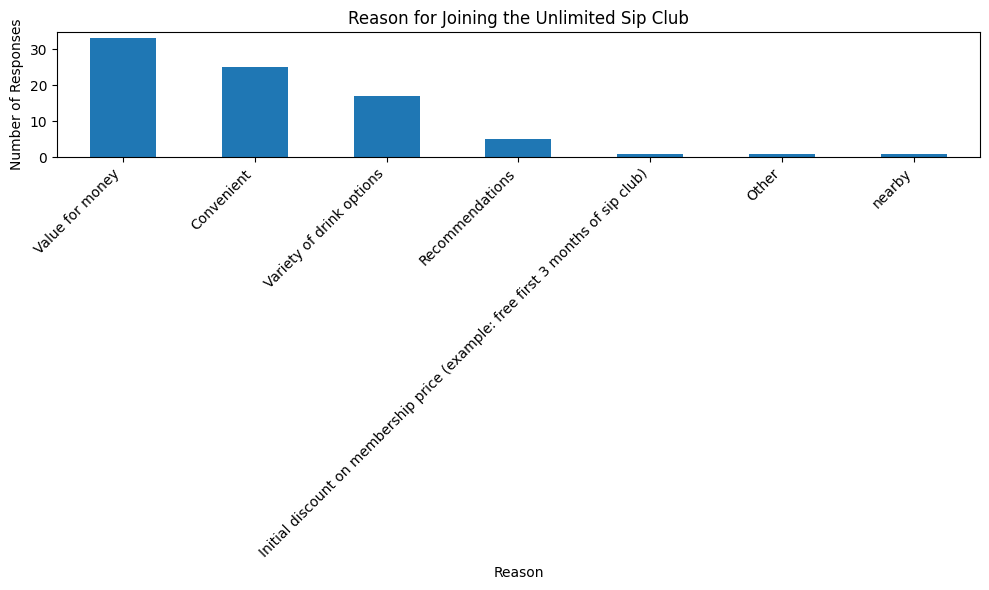

In [1]:
# Erica's Visualization #1 - Bar Charts
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

if 'df' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)

members = df[df['Are you currently a member of the Unlimited Sip Club?'] == 'Yes']
reasons = members['If yes, what motivated you to join the Unlimited Sip Club? (Select all that apply)'].str.get_dummies(sep=', ')
count = reasons .sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
count.plot(kind='bar')
plt.title('Reason for Joining the Unlimited Sip Club')
plt.xlabel('Reason')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# **Erica's 2nd visualization -- stacked bar chart**

This is another visualization similar to the one above that will relate the frequency of panera visits and how satisifed customers are with the subscription service. This is interesting to investigate since it helps us determine how satisifed the customers are with the sip club and how frequntly they visit Panera.

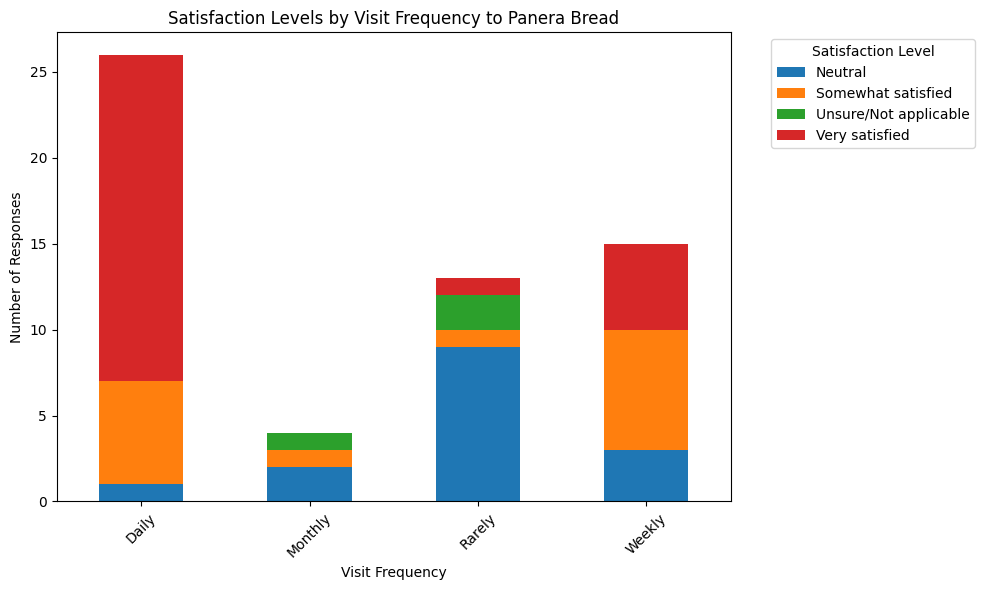

In [2]:
# Erica's second visualization -- stacked bar chart
import seaborn as sns
import matplotlib.pyplot as plt

pivot_data = df.pivot_table(index='How often do you visit Panera Bread?',
                            columns='How satisfied are you with the Unlimited Sip Club? (If applicable)',
                            aggfunc='size', fill_value = 0)
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Satisfaction Levels by Visit Frequency to Panera Bread')
plt.xlabel('Visit Frequency')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# ** ML Analyses by Erica:**
*** At least two ML analyses on your dataset, along with a baseline comparison and an interpretation of the result that you obtain. Write the name of the member(s) who is responsible for it while explaining it.***

In [3]:
# Import Necessary Librabries for ML analyses by Erica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score


In [6]:
# Random Forest Classifier ML Analyses
# Load the dataset
# data = pd.read_csv("Unlimited.csv")
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

data['Satisfaction_Binary'] = data['How satisfied are you with the Unlimited Sip Club? (If applicable)'].apply(lambda x: 1 if x == 'Very satisfied' else 0)
features = data[['What is your age group?', 'How often do you visit Panera Bread?', 'Are you currently a member of the Unlimited Sip Club?', 'Has the Unlimited Sip Club influenced your decision to choose Panera over other dining options?']]
target = data['Satisfaction_Binary']

# Preprocessing using one hot encoding for categorical variables
# looked into this example: https://www.geeksforgeeks.org/ml-one-hot-encoding/
categories = features.select_dtypes(include=['object']).columns
preprocess = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categories)
], remainder='passthrough')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# train random forest
training = make_pipeline(preprocess, RandomForestClassifier(random_state=42))
training.fit(X_train, y_train)

# make the predictions and evaluate the model
predict = training.predict(X_test)
ROC_scores = training.predict_proba(X_test)[:, 1]
print("Erica's Random Forest ML Analyses:\n")
print("Accuracy:", round(accuracy_score(y_test, predict), 2))
print("Precision:", round(precision_score(y_test, predict), 2))
print("Recall:", round(recall_score(y_test, predict), 2))
print("F1 Score:", round(f1_score(y_test, predict), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, ROC_scores), 2))


Erica's Random Forest ML Analyses:

Accuracy: 0.69
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
ROC-AUC Score: 0.86


In [7]:
# ML Analyses for Logistic Regression
# training
lr_pipeline = make_pipeline(preprocessor, LogisticRegression(random_state=42, max_iter=1000))
lr_pipeline.fit(X_train, y_train)

# predicitions for the logistic regression
lr_predict = lr_pipeline.predict(X_test)
lr_probability_scores = lr_pipeline.predict_proba(X_test)[:, 1]
print("\nBaseline: Logistic Regression Metrics\n")
print("Accuracy:", round(accuracy_score(y_test, lr_predict), 2))
print("Precision:", round(precision_score(y_test, lr_predict), 2))
print("Recall:", round(recall_score(y_test, lr_predict), 2))
print("F1 Score:", round(f1_score(y_test, lr_predict), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, lr_probability_scores), 2))



Baseline: Logistic Regression Metrics

Accuracy: 0.77
Precision: 0.8
Recall: 0.67
F1 Score: 0.73
ROC-AUC Score: 0.93


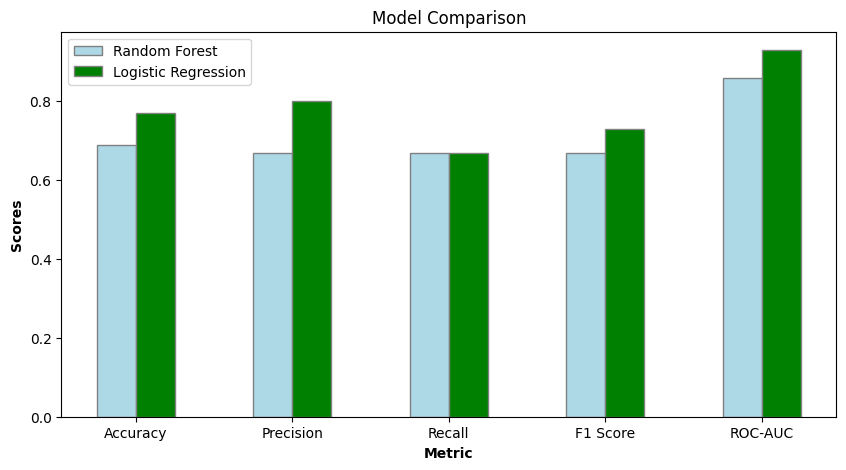

In [8]:
# Visual to comapre both of the models
# metrics for both of the models
metricsLinear = [0.77, 0.8, 0.67, 0.73, 0.93]  # Logistic Regression
metricsRandom = [0.69, 0.67, 0.67, 0.67, 0.86]  # Random Forest
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
fig, ax = plt.subplots(figsize=(10, 5))

# Set position of bar on X axis
width = 0.25
r1 = np.arange(len(metricsRandom))
r2 = [x + width for x in r1]

# Make the plot
ax.bar(r1, metricsRandom, color='lightblue', width=width, edgecolor='grey', label='Random Forest')
ax.bar(r2,metricsLinear, color='green', width=width, edgecolor='grey', label='Logistic Regression')
ax.set_xlabel('Metric', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Model Comparison')
ax.set_xticks([r + width/2 for r in range(len(metricsRandom))])
ax.set_xticklabels(labels)

ax.legend()
plt.show()



# **Baseline Comparison by Erica**:
The logistic regression model performs better than the random forest model across most of the metrics. This is particularly true within the ROC-AUC score which indicates that the logistic regression model does a much better job distinguishing between satisified and unsatisifed customers. The higher performance in the logistic regression model could mean that the dataset is more linear so this model benefits from this.

There is also a higher accuracy and precision score in the logistic regression model compared to the random forest classifier. This suggests that it makes fewer false positive errors in the logistic regression model. The F1 score is also higher for the logistic regression model which means its more balanced in terms of precision and recall.

Given the analyses done, I would favor the logistic regression model for this dataset.



# **Visualization #3  - Age Distribution of Sip Club Members by Abdullah **

This visualization can provide insights into the age distribution of the Sip Club members. It’s interesting to investigate this because it can help us understand which age group is most attracted to the subscription service.

<Figure size 1000x600 with 0 Axes>

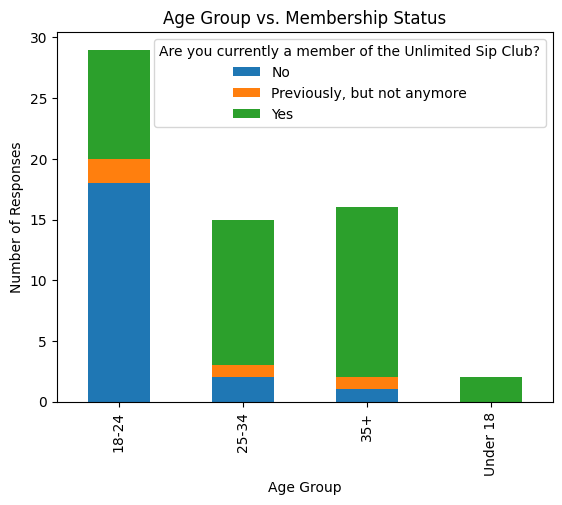

In [9]:
# Age Group vs. Membership Status
age_vs_membership = df.groupby(['What is your age group?', 'Are you currently a member of the Unlimited Sip Club?']).size().unstack()

plt.figure(figsize=(10, 6))
age_vs_membership.plot(kind='bar', stacked=True)
plt.title('Age Group vs. Membership Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Responses')
plt.show()




# **Visualization #4 by Kamran **

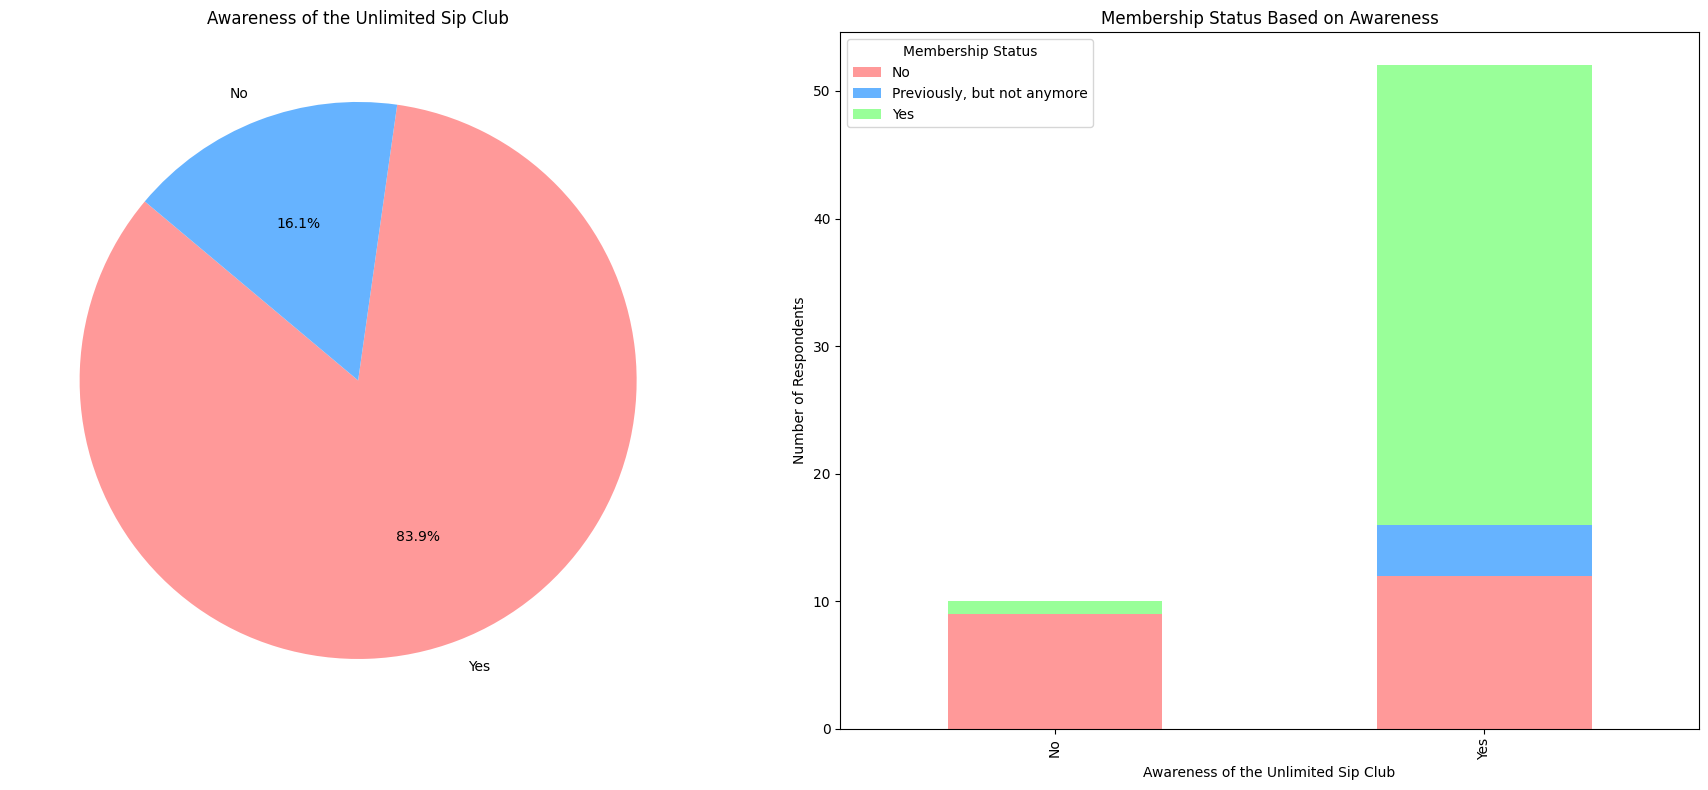

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from google.colab import files

if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)

awareness_counts = data['Were you aware of the Unlimited Sip Club before this survey?'].value_counts()
membership_counts = data.groupby('Were you aware of the Unlimited Sip Club before this survey?')['Are you currently a member of the Unlimited Sip Club?'].value_counts().unstack()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for awareness
ax[0].pie(awareness_counts, labels=awareness_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[0].set_title('Awareness of the Unlimited Sip Club')

# Bar chart for membership status based on awareness
membership_counts.plot(kind='bar', ax=ax[1], stacked=True, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
ax[1].set_title('Membership Status Based on Awareness')
ax[1].set_ylabel('Number of Respondents')
ax[1].set_xlabel('Awareness of the Unlimited Sip Club')
ax[1].legend(title='Membership Status')

plt.tight_layout()
plt.show()

# Visualization #4 - Age vs Likelihood of Satisfaction by Dua'a


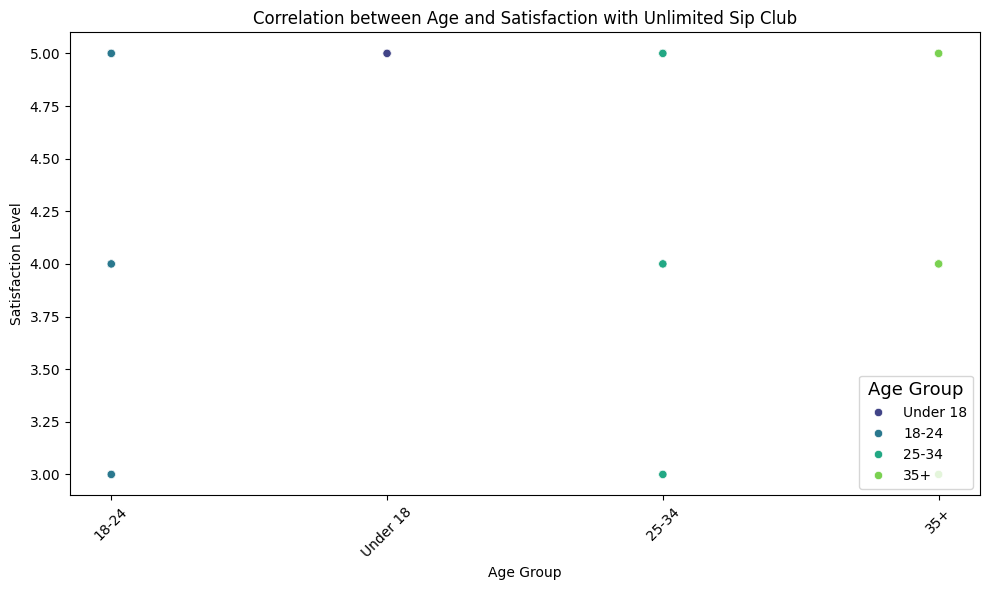

In [11]:
# Age Group Vs Satisfaction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Map satisfaction levels to numerical values for ordering
satisfaction_mapping = {"Not at all": 1, "Not really": 2, "Neutral": 3, "Somewhat satisfied": 4, "Very satisfied": 5}
df["Satisfaction Level"] = df["How satisfied are you with the Unlimited Sip Club? (If applicable)"].map(satisfaction_mapping)

# Set order for age groups
age_order = ["Under 18", "18-24", "25-34", "35+"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="What is your age group?", y="Satisfaction Level", hue="What is your age group?", hue_order=age_order, palette="viridis", legend="full")

# Set labels and title
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Level")
plt.title("Correlation between Age and Satisfaction with Unlimited Sip Club")

# Customize legend
plt.legend(title="Age Group", title_fontsize='13', loc='lower right')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization #5 by Habeeb


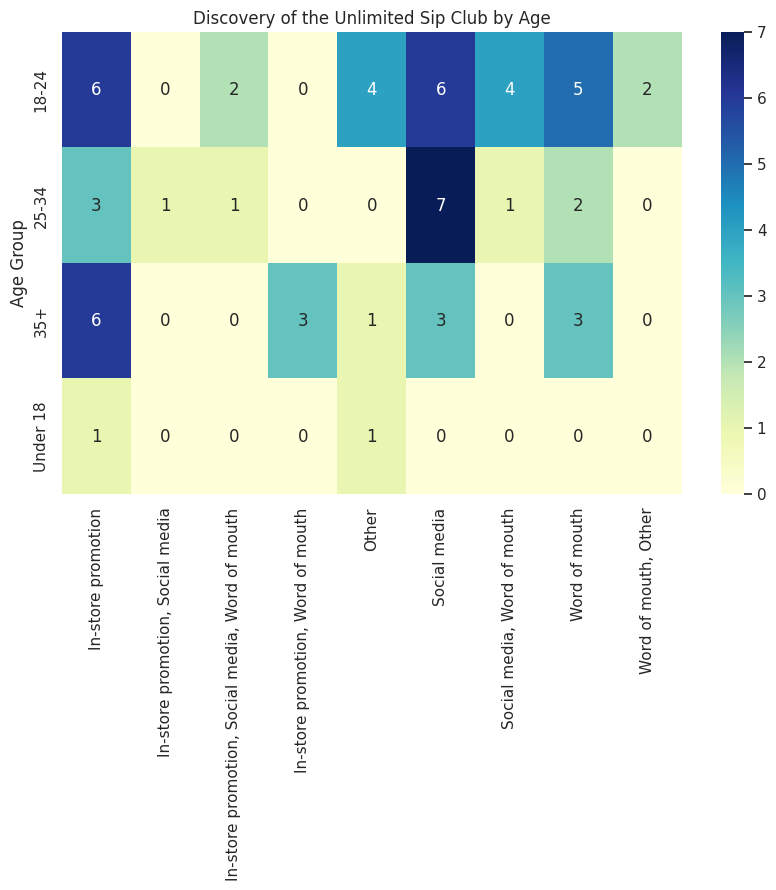

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

promotion = set()
for x in df['How did you first learn about the Unlimited Sip Club? (Select all that apply)']:
  promotion.update(x.split(';'))
promotion = sorted(promotion)

# for i, row in df.iterrows():
#     for channel in row['How did you first learn about the Unlimited Sip Club? (Select all that apply)'].split(';'):
#         df.at[i, channel] = 1

# diff_df = df[['What is your age group?'] + promotion]
# diff_df = diff_df.fillna(0)

heatmap_data = df.pivot_table(index='What is your age group?', columns='How did you first learn about the Unlimited Sip Club? (Select all that apply)', aggfunc='size')
heatmap_data = heatmap_data.fillna(0)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)

plt.title('Discovery of the Unlimited Sip Club by Age')
plt.xlabel("")

plt.ylabel('Age Group')
plt.show()




# Why this is interesting to note by Habeeb. 📓
I think its noteworthy to look at how different age groups hear about promotions in general, it gives us insight as to how promotions in general get to the consumers. For example, around the 18-34 demographic, there's not only the most responses in those categories, but the most when it came to hearing about the Unlimited Sip Club through In-Store Promotions and Social Media. It also tells us that the 18-24 demographic goes out more, considering they have heard about it through both Word of Mouth and In-Store Promotions.

# Machine Learning Segment:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
if 'data' not in locals():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    data = pd.read_csv(file_name)
# data = pd.read_csv("Unlimited_Panera_Sip_Club_Survey.csv")

data["Sip Club Freq"] = data["How has your frequency of visits to Panera changed since joining the Unlimited Sip Club?"].apply(lambda x: 1 if x == 'Increased' or x == 'Increased significantly' else 0)
# Preprocess the data (handle missing values, encode categorical variables, etc.)
# For simplicity, let's assume the preprocessing steps have been done already.

# Split the data into features (X) and target variable (y)
X = data[["How often do you visit Panera Bread?", "Were you aware of the Unlimited Sip Club before this survey?", "Are you currently a member of the Unlimited Sip Club?", "Do you believe the Unlimited Sip Club is a good value for the price?"]]
y = data["Sip Club Freq"]

categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categorical_features)
], remainder='passthrough')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
pipeline_gb = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))
pipeline_gb.fit(X_train, y_train)
y_pred = pipeline_gb.predict(X_test)

prob_scores = pipeline_gb.predict_proba(X_test)[:, 1]
# Evaluate the performance of the classifier
print("\nGradient Boosting scores \n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))
print("F1 Score:", round(f1_score(y_test, y_pred), 2))
print("ROC-AUC Score:", round(roc_auc_score(y_test, prob_scores), 2))


Gradient Boosting scores 

Accuracy: 0.92
Precision: 0.86
Recall: 1.0
F1 Score: 0.92
ROC-AUC Score: 0.99


**Reflection:**

The most challenging part of the project so far has been to create the ML analyses and meaningful visualizations to interpret the data. Our intital thoughts included some patterns in the subscription service that wasnt obvious but the survey conducted and the data obtained provided us with some valuabel insights. These findings were crucial to understanding the customers satisfaction, level of commitment, reason for joining the club and the foot traffic caused by the unlmited sip club.

As of now, we have some concrete results based on the survey we conducted, but we are still undergoing analyses so we are not there yet. Our analyses are complex and we need more time to clean up our findings in order to draw up solid conclusions based on our data. Our current issues lie in optimizing our analyses.We still need to ensure our findings are as accurate as possible so that we can present our findings in a way that is both easy to digest and compelling to our audience.

We believe that we are on the right track with our project timeline, but certain areas, like our data/ML analysis require more attention. We're planning to allocate more time here to ensure that we meet our project goals within the timeframe.


Based on our initial data exploration and the insights we've gained so far, we're confident to continue wokring on our project. Despite the challenges we faced, we learned a lot with practical hands on experience! Gathering and handling real world data helped us understadn the complexities involved in data analyses.

**Next Steps:**

We will go through all of of data and gather more if time permits. Then, we will do research to determine how or if the panera unlimited sip club has made an impact on customer behavior, satisfaction, and its overall impact on revenue. We also need to go through all of our data and clean it so that we will use what is most useful or relevant.

To do all of this we will need to complete all the data cleaning and preprocessing, optimize the analyses models and perform model testing. We will also need to write up our final report.